In [1]:
import os
import shutil
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

import numpy as np
import math

plt.rcParams["font.size"] = 25
plt.rcParams['font.sans-serif'] = ['Arial']

#pd.options.mode.copy_on_write = True


In [2]:
folder_path = "../0_Data/2_Compiled_Data/"

pivot_chem_df = pd.read_excel(folder_path + "pivot_chem_df.xlsx")
pivot_bulk_comp_df = pd.read_excel(folder_path + "pivot_bulk_comp_df.xlsx")
Param_compile_df = pd.read_excel(folder_path + "Param_compile_df.xlsx")
pivot_error_df = pd.read_excel(folder_path + "pivot_error_df.xlsx")
pivot_bulk_mode_df = pd.read_excel(folder_path + "pivot_bulk_mode_df.xlsx")


In [3]:
print("Chem col: " + pivot_chem_df.columns)
print("Chem col: " + pivot_bulk_comp_df.columns)
print("Chem col: " + Param_compile_df.columns)
print(pivot_bulk_mode_df.columns)


Index(['Chem col: Sample', 'Chem col: Instrument', 'Chem col: Rock_Type',
       'Chem col: Phase', 'Chem col: Phase Quantity', 'Chem col: Al2O3',
       'Chem col: CO2', 'Chem col: CaO', 'Chem col: Cl', 'Chem col: F',
       'Chem col: Fe2O3', 'Chem col: H2O', 'Chem col: K2O', 'Chem col: MgO',
       'Chem col: MnO', 'Chem col: Na2O', 'Chem col: P2O5', 'Chem col: SO3',
       'Chem col: SiO2', 'Chem col: TiO2'],
      dtype='object')
Index(['Chem col: Sample', 'Chem col: Instrument', 'Chem col: Rock_Type',
       'Chem col: Phase', 'Chem col: Phase Quantity', 'Chem col: Al2O3',
       'Chem col: CO2', 'Chem col: CaO', 'Chem col: Cl', 'Chem col: F',
       'Chem col: Fe2O3', 'Chem col: H2O', 'Chem col: K2O', 'Chem col: MgO',
       'Chem col: MnO', 'Chem col: Na2O', 'Chem col: P2O5', 'Chem col: SO3',
       'Chem col: SiO2', 'Chem col: TiO2'],
      dtype='object')
Index(['Chem col: Unnamed: 0', 'Chem col: Sample', 'Chem col: Instrument',
       'Chem col: Rock_Type', 'Chem col: Phase'

In [4]:
pivot_bulk_mode_df[pivot_bulk_mode_df['Qquartz'] >0]
pivot_bulk_mode_df.loc[61]


Sample            SP-MTN-62
Instrument         SPring-8
Rock_Type           Pelitic
QActinolite             0.0
QAlbite                 0.0
QCalcite            0.00051
QEpidote             0.0061
QFluorapatite           0.0
QGlaucophane            0.0
QGraphite2h          0.0025
QHematite               0.0
QSiO2p3221           0.4458
QTiO2r                  0.0
Qalbite              0.1721
Qchlorite2b          0.0937
Qchlorite2bdis          0.0
Qepidote                0.0
Qfluorapa           0.00075
Qilmenite               0.0
Qmusc2m1             0.2122
Qpyrite                 0.0
Qquartz              0.0498
Qtitanite           0.01653
Name: 61, dtype: object

In [5]:
#Mafic_SP8_List = pivot_bulk_comp_df[(pivot_bulk_comp_df["Rock_Type"]=="Mafic")&(pivot_bulk_comp_df["Instrument"]=="SPring-8")]["Sample"].unique()
#Mafic_Lab_List = pivot_bulk_comp_df[(pivot_bulk_comp_df["Rock_Type"]=="Mafic")&(pivot_bulk_comp_df["Instrument"]=="Laboratory")]["Sample"].unique()
#Pelitic_SP8_List = pivot_bulk_comp_df[(pivot_bulk_comp_df["Rock_Type"]=="Pelitic")&(pivot_bulk_comp_df["Instrument"]=="SPring-8")]["Sample"].unique()
#Pelitic_Lab_List = pivot_bulk_comp_df[(pivot_bulk_comp_df["Rock_Type"]=="Pelitic")&(pivot_bulk_comp_df["Instrument"]=="Laboratory")]["Sample"].unique()

# Compile Sample list and names

Mafic_Lab_List =['46_MTN2011090101B_Theta_2-Theta',
       '47_MTN2011090101C_Theta_2-Theta',
       '48_MTN2011090101D_Theta_2-Theta',
       '49_MTN2011090101E_Theta_2-Theta',
       '50_MTN2011090101F_17_Theta_2-Theta',
       '51_MTN2011090101G_Theta_2-Theta',
       '63_MTN2107310101A_A-1_Theta_2-Theta',
       '64_MTN2107310101A_A-2_Theta_2-Theta',
       '65_MTN2107310101A_B-1_Theta_2-Theta',
       '66_MTN2107310101A_B-2_retry_Theta_2-Theta',
       '67_MTN2107310101A_C-1', '68_MTN2107310101A_C-2_Theta_2-Theta',
       '104_MTN22051304_Theta_2-Theta', '105_MTN22051305_Theta_2-Theta',
       '106_MTN22051306_Theta_2-Theta', '112_MTN22051312_Theta_2-Theta',
       '118_MTN22051301-01_Theta_2-Theta', '119_MTN22051301-02',
       '121_MTN22051302-1_Theta_2-Theta',
       '122_MTN22051302-2_Theta_2-Theta',
       '123_MTN22051302-3_Theta_2-Theta',
       '124_MTN22051302-4_Theta_2-Theta',
       '138_10rpm-8-1903-8_Theta_2-Theta',
       '139_10rpm-7-1903-7_Theta_2-Theta',
       '140_10rpm-6-1903-6_Theta_2-Theta',
       '141_10rpm-5-1903-5_Theta_2-Theta',
]

Mafic_SP8_List = ['SP-MTN-42', 'SP-MTN-43', 'SP-MTN-44', 'SP-MTN-45', 'SP-MTN-46',
       'SP-MTN-47', 'SP-MTN-56', 'SP-MTN-57', 'SP-MTN-58', 'SP-MTN-59',
       'SP-MTN-60', 'SP-MTN-61', 'SP-MTN-70', 'SP-MTN-71', 'SP-MTN-72',
       'SP-MTN-78', 'SP-MTN-83', 'SP-MTN-84', 'SP-MTN-85', 'SP-MTN-86',
       'SP-MTN-87', 'SP-MTN-88', 'SP-MTN-92', 'SP-MTN-93', 'SP-MTN-94',
       'SP-MTN-95']

Mafic_INDEX = [ 46,  47,  48,  49,  50,  51,  63,  64,  65,  66,  67,  68, 104,
       105, 106, 112, 118, 119, 121, 122, 123, 124, 138, 139, 140, 141]

Pelitic_Lab_List = ['45_MTN2011090101A_Theta_2-Theta',
       '78_MTN2107310101B_Theta_2-Theta',
       '93_MTN2107310101C_1_Theta_2-Theta',
       '94_MTN2107310101C_2_Theta_2-Theta',
       '95_MTN2107310101C_3_Theta_2-Theta',
       '96_MTN2107310101C_4_Theta_2-Theta',
       '97_MTN2107310101C_5_Theta_2-Theta',
       '98_MTN2107310101C_6_Theta_2-Theta',
       '99_MTN2107310101C_7_Theta_2-Theta',
       '107_MTN22051307_Theta_2-Theta', '108_MTN22051308_Theta_2-Theta',
       '109_MTN22051309_Theta_2-Theta', '110_MTN22051310_Theta_2-Theta',
       '111_MTN22051311_Theta_2-Theta', '113_MTN220513Q1_Theta_2-Theta',
       '114_MTN220513Q2_Theta_2-Theta',
       '135_10rpm-2-1903-2_Theta_2-Theta',
       '136_10rpm-1-1903-1_Theta_2-Theta', '144_80rpm_Theta_2-Theta',
       '145_80rpm_Theta_2-Theta', '146_80rpm_Theta_2-Theta','147_Theta_2-Theta', ]

Pelitic_SP8_List = ['SP-MTN-41', 
       'SP-MTN-62', 
       'SP-MTN-63', 'SP-MTN-64', 'SP-MTN-65',
       'SP-MTN-66', 'SP-MTN-67', 'SP-MTN-68', 'SP-MTN-69', 'SP-MTN-73',
       'SP-MTN-74', 'SP-MTN-75', 'SP-MTN-76', 'SP-MTN-77', 'SP-MTN-79',
       'SP-MTN-80', 'SP-MTN-89', 'SP-MTN-90', 'SP-MTN-96', 'SP-MTN-97',
       'SP-MTN-98', 'SP-MTN-99']

Pelitic_INDEX = [45,  
                 78,  
                 93,  94,  95,  96,  97,  98,  99, 107, 108, 109, 110,
       111, 113, 114, 135, 136, 144, 145, 146, 147]


In [6]:
sample_name_list_df = pd.DataFrame([Mafic_SP8_List+Pelitic_SP8_List,Mafic_Lab_List+Pelitic_Lab_List], index=["SP-8", "LAB"]).T

sample_name_list_df.loc[sample_name_list_df["SP-8"].isin(Mafic_SP8_List), "Rock_Type"] = "Mafic Schist"
sample_name_list_df.loc[sample_name_list_df["SP-8"].isin(Pelitic_SP8_List), "Rock_Type"] = "Pelitic Schist"
sample_name_list_df.to_excel(folder_path + "Sample_name_list.xlsx")


# 1. Compile Bulk chemical composition

In [7]:
########################################################################################################################
#
# 水など揮発性成分を含んだBulk composition
#
########################################################################################################################
# Define paths
ALL_SAMPLE_INFO_path = "../0_Data/0_sample_excel/201105-09_四国三波川データ.xlsx"

# Load data
ALL_SAMPLE_INFO_XRF = pd.read_excel(ALL_SAMPLE_INFO_path, sheet_name="Major_XRF_DATA", index_col=0).iloc[1:]

############################################################ Bulk chemical composition
# compile_duplicate_phase
def compile_composition(df):
    df = df.fillna(0)
    # QalbiteとQAlbiteの合計を計算
    df['LOI'] = df['H2O']+df['CO2']+df['Cl']+df['F']
    return df
"""
Index(['Instrument', 'Rock_Type', 'Phase', 'Phase Quantity', 'Al2O3', 'CO2',
       'CaO', 'Cl', 'F', 'Fe2O3', 'H2O', 'K2O', 'MgO', 'MnO', 'Na2O', 'P2O5',
       'SiO2', 'TiO2', 'INDEX'],
      dtype='object')
"""

############################## Mafic sample 
# Prepare Mafic sample data
# Convert lab list to DataFrame and extract numbers
Mafic_Lab_List_df = pd.DataFrame([path.split("_") for path in Mafic_Lab_List])
Mafic_Lab_List_number = Mafic_Lab_List_df[0].astype("int")
Mafic_Lab_List_number_series = pd.Series(Mafic_Lab_List_number, name="INDEX")

# Compile sample list
Mafic_Sample_List = pd.DataFrame({'Lab': Mafic_Lab_List_number, 'SP-8': Mafic_SP8_List})

# Compile XRF data -> 100% Normalize
oxides = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']
Mafic_XRF = ALL_SAMPLE_INFO_XRF.loc[Mafic_Lab_List_number].reset_index(drop=True)
Mafic_XRF = pd.concat([Mafic_XRF, Mafic_Lab_List_number_series], axis=1)
Mafic_XRF[oxides] = Mafic_XRF[oxides].div(Mafic_XRF[oxides].sum(axis=1), axis=0).apply(lambda x: 100*x)

# Compile SP-8 XRF data
Mafic_SP8_XRF = pivot_bulk_comp_df[pivot_bulk_comp_df["Sample"].isin(Mafic_SP8_List)]
Mafic_SP8_XRF = Mafic_SP8_XRF.set_index('Sample')
Mafic_SP8_XRF = Mafic_SP8_XRF.loc[Mafic_SP8_List]
Mafic_SP8_XRF = Mafic_SP8_XRF.reset_index(drop=True)
Mafic_SP8_XRF = pd.concat([Mafic_SP8_XRF, Mafic_Lab_List_number_series], axis=1)
Mafic_SP8_XRF = compile_composition(Mafic_SP8_XRF)


# Compile Lab XRF data
Mafic_LAB_XRF = pivot_bulk_comp_df[pivot_bulk_comp_df["Sample"].isin(Mafic_Lab_List)]
Mafic_LAB_XRF = Mafic_LAB_XRF.set_index('Sample')
Mafic_LAB_XRF = Mafic_LAB_XRF.loc[Mafic_Lab_List]
Mafic_LAB_XRF = Mafic_LAB_XRF.reset_index(drop=True)
Mafic_LAB_XRF = pd.concat([Mafic_LAB_XRF, Mafic_Lab_List_number_series], axis=1)
Mafic_LAB_XRF = compile_composition(Mafic_LAB_XRF)
############################## Mafic sample 

############################## Pelitic sample 
# Prepare Pelitic sample data
# Convert lab list to DataFrame and extract numbers
Pelitic_Lab_List_df = pd.DataFrame([path.split("_") for path in Pelitic_Lab_List])
Pelitic_Lab_List_number = Pelitic_Lab_List_df[0].astype("int")
Pelitic_Lab_List_number_series = pd.Series(Pelitic_Lab_List_number, name="INDEX")

# Compile sample list
Pelitic_Sample_List = pd.DataFrame({'Lab': Pelitic_Lab_List_number, 'SP-8': Pelitic_SP8_List})

# Compile XRF data -> 100% Normalize
oxides = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']
Pelitic_XRF = ALL_SAMPLE_INFO_XRF.loc[Pelitic_Lab_List_number].reset_index(drop=True)
Pelitic_XRF = pd.concat([Pelitic_XRF, Pelitic_Lab_List_number_series], axis=1)
Pelitic_XRF[oxides] = Pelitic_XRF[oxides].div(Pelitic_XRF[oxides].sum(axis=1), axis=0).apply(lambda x: 100*x)


# Compile SP-8 XRF data
Pelitic_SP8_XRF = pivot_bulk_comp_df[pivot_bulk_comp_df["Sample"].isin(Pelitic_SP8_List)]
Pelitic_SP8_XRF = Pelitic_SP8_XRF.set_index('Sample')
Pelitic_SP8_XRF = Pelitic_SP8_XRF.loc[Pelitic_SP8_List]
Pelitic_SP8_XRF = Pelitic_SP8_XRF.reset_index(drop=True)
Pelitic_SP8_XRF = pd.concat([Pelitic_SP8_XRF, Pelitic_Lab_List_number_series], axis=1)
Pelitic_SP8_XRF = compile_composition(Pelitic_SP8_XRF)


# Compile Lab XRF data
Pelitic_LAB_XRF = pivot_bulk_comp_df[pivot_bulk_comp_df["Sample"].isin(Pelitic_Lab_List)]
Pelitic_LAB_XRF = Pelitic_LAB_XRF.set_index('Sample')
Pelitic_LAB_XRF = Pelitic_LAB_XRF.loc[Pelitic_Lab_List]
Pelitic_LAB_XRF = Pelitic_LAB_XRF.reset_index(drop=True)
Pelitic_LAB_XRF = pd.concat([Pelitic_LAB_XRF, Pelitic_Lab_List_number_series], axis=1)
Pelitic_LAB_XRF = compile_composition(Pelitic_LAB_XRF)
############################## Pelitic sample 

############################## Compile data for each rock type
# Mafic
Mafic_XRF_melt = pd.melt(Mafic_XRF, id_vars=['INDEX'], var_name='oxides', value_name='XRF comp.')
Mafic_SP8_XRF_melt = pd.melt(Mafic_SP8_XRF, id_vars=['INDEX'], var_name='oxides', value_name='SP8-XRD comp.')
Mafic_LAB_XRF_melt = pd.melt(Mafic_LAB_XRF, id_vars=['INDEX'], var_name='oxides', value_name='LAB-XRD comp.')

Mafic_compiled_data_XRF = pd.merge(Mafic_XRF_melt, Mafic_SP8_XRF_melt,  on=['INDEX', 'oxides'])
Mafic_compiled_data_XRF = pd.merge(Mafic_compiled_data_XRF, Mafic_LAB_XRF_melt, on=['INDEX', 'oxides'])

# Pelitic
Pelitic_XRF_melt = pd.melt(Pelitic_XRF, id_vars=['INDEX'], var_name='oxides', value_name='XRF comp.')
Pelitic_SP8_XRF_melt = pd.melt(Pelitic_SP8_XRF, id_vars=['INDEX'], var_name='oxides', value_name='SP8-XRD comp.')
Pelitic_LAB_XRF_melt = pd.melt(Pelitic_LAB_XRF, id_vars=['INDEX'], var_name='oxides', value_name='LAB-XRD comp.')

Pelitic_compiled_data_XRF = pd.merge(Pelitic_XRF_melt, Pelitic_SP8_XRF_melt, on=['INDEX', 'oxides'])
Pelitic_compiled_data_XRF = pd.merge(Pelitic_compiled_data_XRF, Pelitic_LAB_XRF_melt, on=['INDEX', 'oxides'])
############################## Compile data for each rock type

############################################################ Bulk chemical composition

# OUTPUT
#Mafic_compiled_data_XRF
Mafic_compiled_data_XRF.to_excel(folder_path + "Mafic_compiled_data_XRF.xlsx")
#Pelitic_compiled_data_XRF
Pelitic_compiled_data_XRF.to_excel(folder_path + "Pelitic_compiled_data_XRF.xlsx")


In [8]:
########################################################################################################################
#
# 水など揮発性成分をのぞいて、XRFの測定条件と同等（LOI後）にしたBulk composition
#
########################################################################################################################

# Define paths
ALL_SAMPLE_INFO_path = "../0_Data/0_sample_excel/201105-09_四国三波川データ.xlsx"

# Load data
ALL_SAMPLE_INFO_XRF = pd.read_excel(ALL_SAMPLE_INFO_path, sheet_name="Major_XRF_DATA", index_col=0).iloc[1:]

############################################################ Bulk chemical composition
# compile_duplicate_phase
def compile_composition(df):
    df = df.fillna(0)
    # QalbiteとQAlbiteの合計を計算
    df['LOI'] = df['H2O']+df['CO2']+df['Cl']+df['F']
    return df
"""
Index(['Instrument', 'Rock_Type', 'Phase', 'Phase Quantity', 'Al2O3', 'CO2',
       'CaO', 'Cl', 'F', 'Fe2O3', 'H2O', 'K2O', 'MgO', 'MnO', 'Na2O', 'P2O5',
       'SiO2', 'TiO2', 'INDEX'],
      dtype='object')
"""

############################## Mafic sample 
# Prepare Mafic sample data
# Convert lab list to DataFrame and extract numbers
Mafic_Lab_List_df = pd.DataFrame([path.split("_") for path in Mafic_Lab_List])
Mafic_Lab_List_number = Mafic_Lab_List_df[0].astype("int")
Mafic_Lab_List_number_series = pd.Series(Mafic_Lab_List_number, name="INDEX")

# Compile sample list
Mafic_Sample_List = pd.DataFrame({'Lab': Mafic_Lab_List_number, 'SP-8': Mafic_SP8_List})

# Compile XRF data
Mafic_XRF = ALL_SAMPLE_INFO_XRF.loc[Mafic_Lab_List_number].reset_index(drop=True)
Mafic_XRF = pd.concat([Mafic_XRF, Mafic_Lab_List_number_series], axis=1)

# Compile SP-8 XRF data
Mafic_SP8_XRF = pivot_bulk_comp_df[pivot_bulk_comp_df["Sample"].isin(Mafic_SP8_List)]
Mafic_SP8_XRF = Mafic_SP8_XRF.set_index('Sample')
Mafic_SP8_XRF = Mafic_SP8_XRF.loc[Mafic_SP8_List]
Mafic_SP8_XRF = Mafic_SP8_XRF.reset_index(drop=True)
Mafic_SP8_XRF = pd.concat([Mafic_SP8_XRF, Mafic_Lab_List_number_series], axis=1)
Mafic_SP8_XRF = compile_composition(Mafic_SP8_XRF)
# float64型の列のみを選択→LOIで割り算→LOI後の値に変換
Mafic_SP8_XRF_ = Mafic_SP8_XRF.select_dtypes(include=["float64"]).apply(lambda x: x / (100 - Mafic_SP8_XRF["LOI"]) * 100)
Mafic_SP8_XRF[Mafic_SP8_XRF_.columns] = Mafic_SP8_XRF_


# Compile Lab XRF data
Mafic_LAB_XRF = pivot_bulk_comp_df[pivot_bulk_comp_df["Sample"].isin(Mafic_Lab_List)]
Mafic_LAB_XRF = Mafic_LAB_XRF.set_index('Sample')
Mafic_LAB_XRF = Mafic_LAB_XRF.loc[Mafic_Lab_List]
Mafic_LAB_XRF = Mafic_LAB_XRF.reset_index(drop=True)
Mafic_LAB_XRF = pd.concat([Mafic_LAB_XRF, Mafic_Lab_List_number_series], axis=1)
Mafic_LAB_XRF = compile_composition(Mafic_LAB_XRF)
Mafic_LAB_XRF_ = Mafic_LAB_XRF.select_dtypes(include=["float64"]).apply(lambda x: x / (100 - Mafic_LAB_XRF["LOI"]) * 100)
Mafic_LAB_XRF[Mafic_LAB_XRF_.columns] = Mafic_LAB_XRF_
############################## Mafic sample 

############################## Pelitic sample 
# Prepare Pelitic sample data
# Convert lab list to DataFrame and extract numbers
Pelitic_Lab_List_df = pd.DataFrame([path.split("_") for path in Pelitic_Lab_List])
Pelitic_Lab_List_number = Pelitic_Lab_List_df[0].astype("int")
Pelitic_Lab_List_number_series = pd.Series(Pelitic_Lab_List_number, name="INDEX")

# Compile sample list
Pelitic_Sample_List = pd.DataFrame({'Lab': Pelitic_Lab_List_number, 'SP-8': Pelitic_SP8_List})

# Compile XRF data
Pelitic_XRF = ALL_SAMPLE_INFO_XRF.loc[Pelitic_Lab_List_number].reset_index(drop=True)
Pelitic_XRF = pd.concat([Pelitic_XRF, Pelitic_Lab_List_number_series], axis=1)

# Compile SP-8 XRF data
Pelitic_SP8_XRF = pivot_bulk_comp_df[pivot_bulk_comp_df["Sample"].isin(Pelitic_SP8_List)]
Pelitic_SP8_XRF = Pelitic_SP8_XRF.set_index('Sample')
Pelitic_SP8_XRF = Pelitic_SP8_XRF.loc[Pelitic_SP8_List]
Pelitic_SP8_XRF = Pelitic_SP8_XRF.reset_index(drop=True)
Pelitic_SP8_XRF = pd.concat([Pelitic_SP8_XRF, Pelitic_Lab_List_number_series], axis=1)
Pelitic_SP8_XRF = compile_composition(Pelitic_SP8_XRF)
Pelitic_SP8_XRF_ = Pelitic_SP8_XRF.select_dtypes(include=["float64"]).apply(lambda x: x / (100 - Pelitic_SP8_XRF["LOI"]) * 100)
Pelitic_SP8_XRF[Pelitic_SP8_XRF_.columns] = Pelitic_SP8_XRF_


# Compile Lab XRF data
Pelitic_LAB_XRF = pivot_bulk_comp_df[pivot_bulk_comp_df["Sample"].isin(Pelitic_Lab_List)]
Pelitic_LAB_XRF = Pelitic_LAB_XRF.set_index('Sample')
Pelitic_LAB_XRF = Pelitic_LAB_XRF.loc[Pelitic_Lab_List]
Pelitic_LAB_XRF = Pelitic_LAB_XRF.reset_index(drop=True)
Pelitic_LAB_XRF = pd.concat([Pelitic_LAB_XRF, Pelitic_Lab_List_number_series], axis=1)
Pelitic_LAB_XRF = compile_composition(Pelitic_LAB_XRF)
Pelitic_LAB_XRF_ = Pelitic_LAB_XRF.select_dtypes(include=["float64"]).apply(lambda x: x / (100 - Pelitic_LAB_XRF["LOI"]) * 100)
Pelitic_LAB_XRF[Pelitic_LAB_XRF_.columns] = Pelitic_LAB_XRF_
############################## Pelitic sample 

############################## Compile data for each rock type
# Mafic
Mafic_XRF_melt = pd.melt(Mafic_XRF, id_vars=['INDEX'], var_name='oxides', value_name='XRF comp.')
Mafic_SP8_XRF_melt = pd.melt(Mafic_SP8_XRF, id_vars=['INDEX'], var_name='oxides', value_name='SP8-XRD comp.')
Mafic_LAB_XRF_melt = pd.melt(Mafic_LAB_XRF, id_vars=['INDEX'], var_name='oxides', value_name='LAB-XRD comp.')

Mafic_compiled_data_XRF = pd.merge(Mafic_XRF_melt, Mafic_SP8_XRF_melt,  on=['INDEX', 'oxides'])
Mafic_compiled_data_XRF = pd.merge(Mafic_compiled_data_XRF, Mafic_LAB_XRF_melt, on=['INDEX', 'oxides'])

# Pelitic
Pelitic_XRF_melt = pd.melt(Pelitic_XRF, id_vars=['INDEX'], var_name='oxides', value_name='XRF comp.')
Pelitic_SP8_XRF_melt = pd.melt(Pelitic_SP8_XRF, id_vars=['INDEX'], var_name='oxides', value_name='SP8-XRD comp.')
Pelitic_LAB_XRF_melt = pd.melt(Pelitic_LAB_XRF, id_vars=['INDEX'], var_name='oxides', value_name='LAB-XRD comp.')

Pelitic_compiled_data_XRF = pd.merge(Pelitic_XRF_melt, Pelitic_SP8_XRF_melt, on=['INDEX', 'oxides'])
Pelitic_compiled_data_XRF = pd.merge(Pelitic_compiled_data_XRF, Pelitic_LAB_XRF_melt, on=['INDEX', 'oxides'])
############################## Compile data for each rock type

############################################################ Bulk chemical composition

# OUTPUT
#Mafic_compiled_data_XRF
Mafic_compiled_data_XRF.to_excel(folder_path + "Mafic_compiled_data_XRF_LOI.xlsx")
#Pelitic_compiled_data_XRF
Pelitic_compiled_data_XRF.to_excel(folder_path + "Pelitic_compiled_data_XRF_LOI.xlsx")


In [9]:
Mafic_compiled_data_XRF.oxides.unique()


array(['Na2O', 'MgO', 'Al2O3', 'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO2',
       'MnO', 'Fe2O3', 'LOI'], dtype=object)

### これ以降では、＊_compiled_data_XRF_LOIのデータを、＊_compiled_data_XRFとして使用する

# 2. Compile Mode

In [10]:
# compile_duplicate_phase
def compile_duplicate_phase(df):
    # QalbiteとQAlbiteの合計を計算
    df['QAlbite_total'] = df['Qalbite']+df['QAlbite']
    df['QApatite_total'] = df['QFluorapatite']+df['Qfluorapa']
    df['Qchlorite_total'] = df['Qchlorite2b'] + df['Qchlorite2bdis']
    df['QAmphibole'] = df['QActinolite'] + df['QGlaucophane']
    df['QQuartz_Total'] = df['QSiO2p3221'] + df['Qquartz']
    df['QEpidote_Total'] = df['QEpidote'] + df['Qepidote']
    return df

# Mafic_SP8_Mode.columns, Pelitic_SP8_Mode.columns
Mode_col_list = [
       'QActinolite', 'QAlbite',
       'QCalcite', 'QEpidote', 'QFluorapatite', 'QGlaucophane', 'QGraphite2h',
       'QHematite', 'QSiO2p3221', 'QTiO2r', 'Qalbite', 'Qchlorite2b',
       'Qchlorite2bdis', 'Qepidote','Qfluorapa', 'Qilmenite', 'Qpyrite', 'Qquartz', 'Qmusc2m1', 'Qtitanite',
       'QAlbite_total', 'QApatite_total', 'Qchlorite_total', "QAmphibole", 'QQuartz_Total', 'QEpidote_Total',
       'INDEX']

################### Create a dictionary for mapping
Mode_col_correct_list = [
       'Actinolite', 'Albite_1',
       'Calcite', 'Epidote_1', 'Fluorapatite_1', 'Glaucophane', 'Graphite',
       'Hematite', 'Quartz_1', 'Rutile', 'Albite_2', 'Chlorite_1',
       'Chlorite_2', 'Epidote_2', 'Fluorapatite_2', 'Ilmenite', 'Pyrite', "Quartz_2", 'Muscovite', 'Titanite',
       'Albite', 'Apatite', 'Chlorite', 'Amphibole', 'Quartz', 'Epidote',
       'INDEX', ]

mineral_mapping = dict(zip(Mode_col_list, Mode_col_correct_list))

# Function to map index values
def map_df(df, mapping):
    return df.map(mapping)
################### Create a dictionary for mapping


In [11]:
############################################################ Bulk mode
# Compile SP-8 data
Mafic_SP8_Mode = pivot_bulk_mode_df[pivot_bulk_mode_df["Sample"].isin(Mafic_SP8_List)]
Mafic_SP8_Mode = Mafic_SP8_Mode.set_index('Sample')
Mafic_SP8_Mode = Mafic_SP8_Mode.loc[Mafic_SP8_List]
Mafic_SP8_Mode = Mafic_SP8_Mode.reset_index(drop=True)
Mafic_SP8_Mode = pd.concat([Mafic_SP8_Mode, Mafic_Lab_List_number_series], axis=1)

Mafic_LAB_Mode = pivot_bulk_mode_df[pivot_bulk_mode_df["Sample"].isin(Mafic_Lab_List)]
Mafic_LAB_Mode = Mafic_LAB_Mode.set_index('Sample')
Mafic_LAB_Mode = Mafic_LAB_Mode.loc[Mafic_Lab_List]
Mafic_LAB_Mode = Mafic_LAB_Mode.reset_index(drop=True)
Mafic_LAB_Mode = pd.concat([Mafic_LAB_Mode, Mafic_Lab_List_number_series], axis=1)

Mafic_SP8_Mode = compile_duplicate_phase(Mafic_SP8_Mode)
Mafic_LAB_Mode = compile_duplicate_phase(Mafic_LAB_Mode)


############################## Compile data for each rock type
Mafic_SP8_Mode_melt = pd.melt(Mafic_SP8_Mode[Mode_col_list], id_vars=['INDEX'], var_name='Minerals', value_name='SP8-XRD Mode')
Mafic_LAB_Mode_melt = pd.melt(Mafic_LAB_Mode[Mode_col_list], id_vars=['INDEX'], var_name='Minerals', value_name='LAB-XRD Mode')

Mafic_compiled_data_Mode = pd.merge(Mafic_SP8_Mode_melt, Mafic_LAB_Mode_melt,  on=['INDEX', 'Minerals'])
############################## Compile data for each rock type

############################################################ Bulk mode


In [12]:
############################################################ Bulk mode
# Compile SP-8 data
Pelitic_SP8_Mode = pivot_bulk_mode_df[pivot_bulk_mode_df["Sample"].isin(Pelitic_SP8_List)]
Pelitic_SP8_Mode = Pelitic_SP8_Mode.set_index('Sample')
Pelitic_SP8_Mode = Pelitic_SP8_Mode.loc[Pelitic_SP8_List]
Pelitic_SP8_Mode = Pelitic_SP8_Mode.reset_index(drop=True)
Pelitic_SP8_Mode = pd.concat([Pelitic_SP8_Mode, Pelitic_Lab_List_number_series], axis=1)

Pelitic_LAB_Mode = pivot_bulk_mode_df[pivot_bulk_mode_df["Sample"].isin(Pelitic_Lab_List)]
Pelitic_LAB_Mode = Pelitic_LAB_Mode.set_index('Sample')
Pelitic_LAB_Mode = Pelitic_LAB_Mode.loc[Pelitic_Lab_List]
Pelitic_LAB_Mode = Pelitic_LAB_Mode.reset_index(drop=True)
Pelitic_LAB_Mode = pd.concat([Pelitic_LAB_Mode, Pelitic_Lab_List_number_series], axis=1)

Pelitic_SP8_Mode = compile_duplicate_phase(Pelitic_SP8_Mode)
Pelitic_LAB_Mode = compile_duplicate_phase(Pelitic_LAB_Mode)

############################## Compile data for each rock type
Pelitic_SP8_Mode_melt = pd.melt(Pelitic_SP8_Mode[Mode_col_list], id_vars=['INDEX'], var_name='Minerals', value_name='SP8-XRD Mode')
Pelitic_LAB_Mode_melt = pd.melt(Pelitic_LAB_Mode[Mode_col_list], id_vars=['INDEX'], var_name='Minerals', value_name='LAB-XRD Mode')

Pelitic_compiled_data_Mode = pd.merge(Pelitic_SP8_Mode_melt, Pelitic_LAB_Mode_melt, on=['INDEX', 'Minerals'])
############################## Compile data for each rock type
############################################################ Bulk mode


In [13]:
# Mapping
Mafic_compiled_data_Mode['Minerals'] = map_df(Mafic_compiled_data_Mode['Minerals'], mineral_mapping)
Pelitic_compiled_data_Mode['Minerals'] = map_df(Pelitic_compiled_data_Mode['Minerals'], mineral_mapping)

# OUTPUT
#Mafic_compiled_data_Mode
#Pelitic_compiled_data_Mode
Mafic_compiled_data_Mode.to_excel(folder_path + "Mafic_compiled_data_Mode.xlsx")
Pelitic_compiled_data_Mode.to_excel(folder_path + "Pelitic_compiled_data_Mode.xlsx")


# 3. Compile Parameter

In [14]:
important_param_value = ['A','B','C','ALPHA','BETA','GAMMA']
use_param_value = ["Sample", 'Phase']+important_param_value 

##################################################
# Create a dictionary for mapping
lab_to_sp8_mapping = dict(zip(Pelitic_Lab_List, Pelitic_SP8_List))

# Function to map index values
def map_index(index, mapping):
    return index.map(mapping)

# Compile SP-8 data
Pelitic_SP8_Param = Param_compile_df[Param_compile_df["Sample"].isin(Pelitic_SP8_List)]
Pelitic_SP8_Param = Pelitic_SP8_Param.set_index('Sample')
Pelitic_SP8_Param = Pelitic_SP8_Param.loc[Pelitic_SP8_List]
Pelitic_SP8_Param = Pelitic_SP8_Param.reset_index()

Pelitic_LAB_Param = Param_compile_df[Param_compile_df["Sample"].isin(Pelitic_Lab_List)]
Pelitic_LAB_Param = Pelitic_LAB_Param.set_index('Sample')
Pelitic_LAB_Param = Pelitic_LAB_Param.loc[Pelitic_Lab_List]
# Replace Pelitic_LAB_Param index based on the mapping
Pelitic_LAB_Param.index = map_index(Pelitic_LAB_Param.index, lab_to_sp8_mapping)
Pelitic_LAB_Param = Pelitic_LAB_Param.reset_index()

Pelitic_SP8_Param_melt = pd.melt(Pelitic_SP8_Param[use_param_value], id_vars=['Sample', 'Phase'], var_name='Param', value_name='SP8 Refinement Parameter')
Pelitic_LAB_Param_melt = pd.melt(Pelitic_LAB_Param[use_param_value], id_vars=['Sample', 'Phase'], var_name='Param', value_name='Lab Refinement Parameter')

Pelitic_compiled_data_Param = pd.merge(Pelitic_SP8_Param_melt, Pelitic_LAB_Param_melt, on=['Sample', 'Phase', 'Param'], how='outer')
##################################################


In [15]:
important_param_value = ['A','B','C','ALPHA','BETA','GAMMA']
use_param_value = ["Sample", 'Phase']+important_param_value 

##################################################
# Create a dictionary for mapping
lab_to_sp8_mapping = dict(zip(Mafic_Lab_List, Mafic_SP8_List))

# Function to map index values
def map_index(index, mapping):
    return index.map(mapping)

# Compile SP-8 data
Mafic_SP8_Param = Param_compile_df[Param_compile_df["Sample"].isin(Mafic_SP8_List)]
Mafic_SP8_Param = Mafic_SP8_Param.set_index('Sample')
Mafic_SP8_Param = Mafic_SP8_Param.loc[Mafic_SP8_List]
Mafic_SP8_Param = Mafic_SP8_Param.reset_index()

Mafic_LAB_Param = Param_compile_df[Param_compile_df["Sample"].isin(Mafic_Lab_List)]
Mafic_LAB_Param = Mafic_LAB_Param.set_index('Sample')
Mafic_LAB_Param = Mafic_LAB_Param.loc[Mafic_Lab_List]
# Replace Mafic_LAB_Param index based on the mapping
Mafic_LAB_Param.index = map_index(Mafic_LAB_Param.index, lab_to_sp8_mapping)
Mafic_LAB_Param = Mafic_LAB_Param.reset_index()

Mafic_SP8_Param_melt = pd.melt(Mafic_SP8_Param[use_param_value], id_vars=['Sample', 'Phase'], var_name='Param', value_name='SP8 Refinement Parameter')
Mafic_LAB_Param_melt = pd.melt(Mafic_LAB_Param[use_param_value], id_vars=['Sample', 'Phase'], var_name='Param', value_name='Lab Refinement Parameter')

Mafic_compiled_data_Param = pd.merge(Mafic_SP8_Param_melt, Mafic_LAB_Param_melt, on=['Sample', 'Phase', 'Param'], how='outer')
##################################################


In [16]:
Mafic_compiled_data_Param = Mafic_compiled_data_Param.replace("UNDEF", np.nan)
Pelitic_compiled_data_Param = Pelitic_compiled_data_Param.replace("UNDEF", np.nan)

# OUTPUT
#Mafic_LAB_Param_melt
#Pelitic_LAB_Param_melt
Mafic_compiled_data_Param.to_excel(folder_path + "Mafic_compiled_data_Param.xlsx")
Pelitic_compiled_data_Param.to_excel(folder_path + "Pelitic_compiled_data_Param.xlsx")


In [17]:
# Labの方ではUNDEFFになる場合がある
#Pelitic_compiled_data_Param[(Pelitic_compiled_data_Param["Phase"]=='Titanite')&(Pelitic_compiled_data_Param["Param"]=='A')]


# 4. Compile XrayDensity

In [18]:
# ファイルからデータを読み込む関数
def read_data_from_file(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
    return data

# データを解析して必要な情報を抽出する関数
def extract_phase_data(data):
    phases = []
    current_phase = {}
    lines = data.split('\n')
    
    is_muscovite = False
    for i, line in enumerate(lines):
        if line.startswith("Local parameters and GOALs for phase"):
            if current_phase:
                phases.append(current_phase)
                current_phase = {}
            phase_name = line.split()[-1]
            current_phase["Phase"] = phase_name
            is_muscovite = "MUSCOVITE" in phase_name
        elif line.startswith("SpacegroupNo"):
            current_phase["SpacegroupNo"] = int(line.split('=')[1])
        elif line.startswith("HermannMauguin"):
            current_phase["HermannMauguin"] = line.split('=')[1]
        elif line.startswith("XrayDensity"):
            current_phase["XrayDensity"] = float(line.split('=')[1])
        elif line.startswith("Rphase"):
            current_phase["Rphase"] = float(line.split('=')[1].strip('%'))
        elif is_muscovite and "K+1" in line:
            # 次の行のpの値を抽出する
            next_line = lines[i + 1]
            if next_line.startswith("p="):
                k_value = float(next_line.split('=')[1].split('+-')[0])
                current_phase["K_value"] = k_value
    
    if current_phase:
        phases.append(current_phase)
    
    return pd.DataFrame(phases)

# Mafic_SP8_Mode.columns, Pelitic_SP8_Mode.columns
Mode_col_list = ['SiO2p3221', 'SiO2p3221-2', 'MUSCOVITE_2M1', 'Titanite', 'Fluorapatite',
       'Epidote', 'Albite', 'Calcite', 'Actinolite', 'Chlorite2bdis', 'Chlorite2b', 
       'CHLORITE_IIb-2', 'Glaucophane', 'Ilmenite', 'TiO2r', 'Hematite',
       'Plagioclase_Albite', 'FLUORAPATITE', 'Graphite-2H', 'Pyrite']

################### Create a dictionary for mapping
Mode_col_correct_list = ['Quartz_1','Quartz_2', 'Muscovite', 'Titanite', 'Apatite',
       'Epidote', 'Albite', 'Calcite', 'Actinolite', 'Chlorite_2', 'Chlorite_1',
       'Chlorite_1', 'Glaucophane', 'Ilmenite', 'Rutile', 'Hematite',
       'Albite', 'Apatite', 'Graphite', 'Pyrite']

phase_mapping = dict(zip(Mode_col_list, Mode_col_correct_list))

# Function to map index values
def map_df(df, mapping):
    return df.map(mapping)
################### Create a dictionary for mapping

# Create a dictionary for mapping # Mafic_Lab_List, Mafic_SP8_List, Mafic_INDEX
sample_to_INDEX_Mapping = dict(zip(Mafic_Lab_List+Pelitic_Lab_List+Mafic_SP8_List+Pelitic_SP8_List, \
                                Mafic_INDEX+Pelitic_INDEX+Mafic_INDEX+Pelitic_INDEX))

# Function to map index values
def map_index(index, mapping):
    return index.map(mapping)


In [19]:
# データが含まれるフォルダーのパスを定義
folder_path = "../0_Data/2_Compiled_Data/"
# サンプル名のリストが含まれるExcelファイルを読み込んでデータフレームにする
Sample_name_list = pd.read_excel(folder_path + "Sample_name_list.xlsx")
############################################################ リートベルトデータフォルダーのパスを定義
M_L_path = "../0_Data/1_Rietveld/Laboratory/Mafic"
P_L_path = "../0_Data/1_Rietveld/Laboratory/Pelitic/"

M_S_path = "../0_Data/1_Rietveld/SPring-8/Mafic"
P_S_path = "../0_DATA/1_Rietveld/SPring-8/Pelitic/"

path_rietveld_folder = [M_L_path, P_L_path, M_S_path, P_S_path]
############################################################ リートベルトデータフォルダーのパスを定義


############################################################ Path_Df
# 指定されたディレクトリおよびそのサブディレクトリ内のすべての.xyファイルを見つけるためにglobを使用
path_glob = []
full_path_glob = []
for path in path_rietveld_folder:
    path_glob_result = glob.glob(path + "/*/*.lst")
    full_path_glob = full_path_glob+path_glob_result

    # Split
    path_glob_result_split = [path.split("/") for path in path_glob_result]
    path_glob = path_glob+path_glob_result

path_glob = [path.split("/") for path in path_glob]
Path_Df = pd.DataFrame([path[-1] for path in path_glob], columns=["lst"])
Path_Df["Path"] = full_path_glob
Path_Df.index = Path_Df["lst"].str.split(".", expand=True)[0]
############################################################ Path_Df
Path_Df.to_excel(folder_path + "Path_Rietveld_lst_df.xlsx")

# NAME LIST
name_SP_Mafic = Sample_name_list[Sample_name_list["Rock_Type"]=="Mafic Schist"]["SP-8"]
name_LAB_Mafic = Sample_name_list[Sample_name_list["Rock_Type"]=="Mafic Schist"]["LAB"]
name_SP_Pelitic = Sample_name_list[Sample_name_list["Rock_Type"]=="Pelitic Schist"]["SP-8"]
name_LAB_Pelitic = Sample_name_list[Sample_name_list["Rock_Type"]=="Pelitic Schist"]["LAB"]

name_SP = Sample_name_list["SP-8"]
name_LAB = Sample_name_list["LAB"]


In [20]:
all_data_LAB = []
all_data_SP8 = []

for SP_sample_name, Lab_sample_name in zip(name_SP, name_LAB):
    print(SP_sample_name, Lab_sample_name)

    SP_path = Path_Df.loc[SP_sample_name]["Path"]
    LAB_path = Path_Df.loc[Lab_sample_name]["Path"]

    #################################################################### LAB
    # ファイルのパス
    file_path = LAB_path
    # ファイルからデータを読み込み
    data = read_data_from_file(file_path)
    # データを解析してDataFrameに変換
    df_LAB = extract_phase_data(data)
    
    # DataFrameにサンプル名を追加
    df_LAB['SP_sample_name'] = SP_sample_name
    df_LAB['Lab_sample_name'] = Lab_sample_name
    df_LAB["Sample"] = Lab_sample_name
    
    # 結果をリストに追加
    all_data_LAB.append(df_LAB)
    #################################################################### LAB

    #################################################################### SP8
    # ファイルのパス
    file_path = SP_path
    # ファイルからデータを読み込み
    data = read_data_from_file(file_path)
    # データを解析してDataFrameに変換
    df_SP8 = extract_phase_data(data)
    
    # DataFrameにサンプル名を追加
    df_SP8['SP_sample_name'] = SP_sample_name
    df_SP8['Lab_sample_name'] = Lab_sample_name
    df_SP8["Sample"] = SP_sample_name
    
    # 結果をリストに追加
    all_data_SP8.append(df_SP8)
    #################################################################### SP8

# 全ての結果を一つのDataFrameに統合
final_df_SP8 = pd.concat(all_data_SP8, ignore_index=True)
final_df_LAB = pd.concat(all_data_LAB, ignore_index=True)
# PhaseをMineral nameにmapping
final_df_SP8['Phase'] = map_df(final_df_SP8['Phase'], phase_mapping)
final_df_LAB['Phase'] = map_df(final_df_LAB['Phase'], phase_mapping)


SP-MTN-42 46_MTN2011090101B_Theta_2-Theta
SP-MTN-43 47_MTN2011090101C_Theta_2-Theta
SP-MTN-44 48_MTN2011090101D_Theta_2-Theta
SP-MTN-45 49_MTN2011090101E_Theta_2-Theta
SP-MTN-46 50_MTN2011090101F_17_Theta_2-Theta
SP-MTN-47 51_MTN2011090101G_Theta_2-Theta
SP-MTN-56 63_MTN2107310101A_A-1_Theta_2-Theta
SP-MTN-57 64_MTN2107310101A_A-2_Theta_2-Theta
SP-MTN-58 65_MTN2107310101A_B-1_Theta_2-Theta
SP-MTN-59 66_MTN2107310101A_B-2_retry_Theta_2-Theta
SP-MTN-60 67_MTN2107310101A_C-1
SP-MTN-61 68_MTN2107310101A_C-2_Theta_2-Theta
SP-MTN-70 104_MTN22051304_Theta_2-Theta
SP-MTN-71 105_MTN22051305_Theta_2-Theta
SP-MTN-72 106_MTN22051306_Theta_2-Theta
SP-MTN-78 112_MTN22051312_Theta_2-Theta
SP-MTN-83 118_MTN22051301-01_Theta_2-Theta
SP-MTN-84 119_MTN22051301-02
SP-MTN-85 121_MTN22051302-1_Theta_2-Theta
SP-MTN-86 122_MTN22051302-2_Theta_2-Theta
SP-MTN-87 123_MTN22051302-3_Theta_2-Theta
SP-MTN-88 124_MTN22051302-4_Theta_2-Theta
SP-MTN-92 138_10rpm-8-1903-8_Theta_2-Theta
SP-MTN-93 139_10rpm-7-1903-7_Theta

In [21]:
# Density
final_df_SP8_XD = final_df_SP8.melt(id_vars=['Sample', 'Phase'], 
                          value_vars=['XrayDensity'], 
                          var_name='Property', 
                          value_name='Value')
final_df_LAB_XD = final_df_LAB.melt(id_vars=['Sample', 'Phase'], 
                          value_vars=['XrayDensity'], 
                          var_name='Property', 
                          value_name='Value')

# Density
final_df_SP8_XD = final_df_SP8.melt(id_vars=['Sample', 'Phase'], 
                          value_vars=['XrayDensity'], 
                          var_name='Property', 
                          value_name='XrayDensity_SP8')
final_df_LAB_XD = final_df_LAB.melt(id_vars=['Sample', 'Phase'], 
                          value_vars=['XrayDensity'], 
                          var_name='Property', 
                          value_name='XrayDensity_LAB')


# K value
final_df_SP8_K = final_df_SP8.melt(id_vars=['Sample', 'Phase'], 
                          value_vars=['K_value'], 
                          var_name='Property', 
                          value_name='K_SP8')
final_df_LAB_K = final_df_LAB.melt(id_vars=['Sample', 'Phase'], 
                          value_vars=['K_value'], 
                          var_name='Property', 
                          value_name='K_LAB')


In [22]:
sample_to_INDEX_Mapping = dict(zip(Mafic_Lab_List+Pelitic_Lab_List+Mafic_SP8_List+Pelitic_SP8_List, \
                                Mafic_INDEX+Pelitic_INDEX+Mafic_INDEX+Pelitic_INDEX))
# Mapping
final_df_SP8_XD["Sample"] = map_index(final_df_SP8_XD["Sample"], sample_to_INDEX_Mapping)
final_df_LAB_XD["Sample"] = map_index(final_df_LAB_XD["Sample"], sample_to_INDEX_Mapping)
final_df_SP8_K["Sample"] = map_index(final_df_SP8_K["Sample"], sample_to_INDEX_Mapping)
final_df_LAB_K["Sample"] = map_index(final_df_LAB_K["Sample"], sample_to_INDEX_Mapping)


In [23]:
# X-ray density
df_XD = pd.merge(final_df_SP8_XD, final_df_LAB_XD, on=['Sample', 'Phase'], how='outer')
df_XD["INDEX"]=df_XD["Sample"]
df_XD["Minerals"]=df_XD["Phase"]

# compile on 'INDEX', 'Minerals'
Mafic_compiled = pd.merge(Mafic_compiled_data_Mode, df_XD, on=['INDEX', 'Minerals'])
Pelitic_compiled = pd.merge(Pelitic_compiled_data_Mode, df_XD, on=['INDEX', 'Minerals'])


### 岩相ごとの中央値をまとめる

In [24]:
mineral_map_dict = {
    "Chlorite_1": "Chlorite",
    "Chlorite_2": "Chlorite",
    "Quartz_1": "Quartz", 
    "Quartz_2": "Quartz", 
}
for df in (Mafic_compiled, Pelitic_compiled):
    df["Minerals"] = (
        df["Minerals"].map(mineral_map_dict)
                      .fillna(df["Minerals"])  # 未マッチを元の名前のまま
    )
df.Minerals.unique()


array(['Calcite', 'Graphite', 'Quartz', 'Chlorite', 'Pyrite', 'Muscovite',
       'Titanite', 'Albite', 'Apatite', 'Epidote'], dtype=object)

In [25]:
def median_by_mineral_source(df, mineral_col="Minerals",
                             sp8_col="XrayDensity_SP8", lab_col="XrayDensity_LAB"):
    # ロング化
    long_df = pd.concat([
        df[[mineral_col, sp8_col]].rename(columns={sp8_col: "Density"}).assign(Source="SP8"),
        df[[mineral_col, lab_col]].rename(columns={lab_col: "Density"}).assign(Source="LAB"),
    ], ignore_index=True)

    # 欠損/非正値除外 → 中央値
    med = (long_df.dropna(subset=["Density", mineral_col])
                   .query("Density > 0")
                   .groupby([mineral_col, "Source"], observed=True)["Density"]
                   .median()
                   .reset_index(name="median"))
    return med

Mafic_mineral_density_med = median_by_mineral_source(Mafic_compiled)
Pelitic_mineral_density_med = median_by_mineral_source(Pelitic_compiled)

display(Mafic_mineral_density_med.sort_values(["Minerals","Source"]))

# save
Mafic_mineral_density_med.to_excel(folder_path + "Mafic_mineral_density_median.xlsx")
Pelitic_mineral_density_med.to_excel(folder_path + "Pelitic_mineral_density_median.xlsx")


,Minerals,Source,median
0,Actinolite,LAB,3.1955
1,Actinolite,SP8,3.1695
2,Albite,LAB,2.6200
3,Albite,SP8,2.6220
4,Apatite,LAB,3.1905
5,Apatite,SP8,3.1945
6,Calcite,LAB,2.7135
7,Calcite,SP8,2.7160
8,Chlorite,LAB,2.8900
9,Chlorite,SP8,2.8895


### ここまででX-ray density (鉱物密度)を算出

### mineral modes (wt.%)-> mineral modes (vol.%)に変換

In [26]:
# # X-ray density
df_XD = pd.merge(final_df_SP8_XD, final_df_LAB_XD, on=['Sample', 'Phase'], how='outer')
df_XD["INDEX"]=df_XD["Sample"]
df_XD["Minerals"]=df_XD["Phase"]

# compile on 'INDEX', 'Minerals'
Mafic_compiled = pd.merge(Mafic_compiled_data_Mode, df_XD, on=['INDEX', 'Minerals'])
Pelitic_compiled = pd.merge(Pelitic_compiled_data_Mode, df_XD, on=['INDEX', 'Minerals'])

# Calculate vol
df_Compiled_mode_Density = pd.concat([Mafic_compiled, Pelitic_compiled]) # 既に上で実行済み
df_Compiled_mode_Density["Mineral_Vol_SP8"] = df_Compiled_mode_Density["SP8-XRD Mode"].fillna(0)/df_Compiled_mode_Density["XrayDensity_SP8"].fillna(0)
df_Compiled_mode_Density["Mineral_Vol_LAB"] = df_Compiled_mode_Density["LAB-XRD Mode"].fillna(0)/df_Compiled_mode_Density["XrayDensity_LAB"].fillna(0)


##################### Calc+Normalize to total 100
df_Compiled_Mineral_vol_SP8 = df_Compiled_mode_Density.pivot_table(index=['INDEX'], columns='Minerals', values='Mineral_Vol_SP8')
df_Compiled_Mineral_vol_LAB = df_Compiled_mode_Density.pivot_table(index=['INDEX'], columns='Minerals', values='Mineral_Vol_LAB')

df_Compiled_Mineral_vol_SP8_SUM = df_Compiled_Mineral_vol_SP8.sum(axis=1)
df_Compiled_Mineral_vol_LAB_SUM = df_Compiled_Mineral_vol_LAB.sum(axis=1)

df_Compiled_Mineral_vol_SP8 = df_Compiled_Mineral_vol_SP8.div(df_Compiled_Mineral_vol_SP8_SUM, axis=0)*100
df_Compiled_Mineral_vol_LAB = df_Compiled_Mineral_vol_LAB.div(df_Compiled_Mineral_vol_LAB_SUM, axis=0)*100
##################### Calc+Normalize to total 100
df_Compiled_Mineral_vol_SP8["Chlorite"] = df_Compiled_Mineral_vol_SP8["Chlorite_1"].fillna(0)+df_Compiled_Mineral_vol_SP8["Chlorite_2"].fillna(0)
df_Compiled_Mineral_vol_LAB["Chlorite"] = df_Compiled_Mineral_vol_LAB["Chlorite_1"].fillna(0)+df_Compiled_Mineral_vol_LAB["Chlorite_2"].fillna(0)

df_Compiled_Mineral_vol_SP8["Amphibole"] = df_Compiled_Mineral_vol_SP8["Actinolite"].fillna(0)+df_Compiled_Mineral_vol_SP8["Glaucophane"].fillna(0)
df_Compiled_Mineral_vol_LAB["Amphibole"] = df_Compiled_Mineral_vol_LAB["Actinolite"].fillna(0)+df_Compiled_Mineral_vol_LAB["Glaucophane"].fillna(0)

df_Compiled_Mineral_vol_SP8["Quartz"] = df_Compiled_Mineral_vol_SP8["Quartz_1"].fillna(0)+df_Compiled_Mineral_vol_SP8["Quartz_2"].fillna(0)
df_Compiled_Mineral_vol_LAB["Quartz"] = df_Compiled_Mineral_vol_LAB["Quartz_1"].fillna(0)#+df_Compiled_Mineral_vol_LAB["Quartz_2"].fillna(0)


drop_list = ["Chlorite_1", "Chlorite_2", "Quartz_1", "Quartz_2"]
df_Compiled_Mineral_vol_SP8 = df_Compiled_Mineral_vol_SP8.drop(drop_list, axis = 1)
drop_list = ["Chlorite_1", "Chlorite_2", "Quartz_1"] # ver240919 Quartz_2はLabにはないので, Dropしない
df_Compiled_Mineral_vol_LAB = df_Compiled_Mineral_vol_LAB.drop(drop_list, axis = 1) 


In [27]:
# Reset index to make 'INDEX' a column
df_Compiled_Mineral_vol_SP8 = df_Compiled_Mineral_vol_SP8.reset_index()
df_Compiled_Mineral_vol_LAB = df_Compiled_Mineral_vol_LAB.reset_index()

# Melt the dataframes
df_Compiled_Mineral_vol_SP8_melted = df_Compiled_Mineral_vol_SP8.melt(id_vars=['INDEX'], var_name='Minerals', value_name='Mineral_Vol_SP8')
df_Compiled_Mineral_vol_LAB_melted = df_Compiled_Mineral_vol_LAB.melt(id_vars=['INDEX'], var_name='Minerals', value_name='Mineral_Vol_LAB')

# Compile
df_Compiled_Mineral_vol = pd.merge(df_Compiled_Mineral_vol_SP8_melted, df_Compiled_Mineral_vol_LAB_melted, on=['INDEX', 'Minerals'], how='outer')

df_Compiled_Mineral_vol.to_excel(folder_path + "df_Compiled_Mineral_vol.xlsx")
df_Compiled_Mineral_vol_SP8.to_excel(folder_path + "df_Compiled_Mineral_vol_SP8.xlsx")
df_Compiled_Mineral_vol_LAB.to_excel(folder_path + "df_Compiled_Mineral_vol_LAB.xlsx")


In [28]:
# EPMA mode data
EPMA_M_path = "../0_DATA/0_Thin_Section_Mode/240827_compile _Mafic.xlsx"
EPMA_P_path = "../0_DATA/0_Thin_Section_Mode/240827_compile _Pelitic.xlsx"

EPMA_M = pd.read_excel(EPMA_M_path, sheet_name="Compile", index_col=0, header=0)*100
EPMA_M["INDEX"]=EPMA_M.index

EPMA_P = pd.read_excel(EPMA_P_path, sheet_name="Compile", index_col=0, header=0)*100
EPMA_P["INDEX"]=EPMA_P.index

EPMA_M_melt = pd.melt(EPMA_M, id_vars=['INDEX'], var_name='Minerals', value_name='EPMA Mode')
EPMA_P_melt = pd.melt(EPMA_P, id_vars=['INDEX'], var_name='Minerals', value_name='EPMA Mode')

Mafic_compiled_data_Mode_EPMA = pd.merge(Mafic_compiled_data_Mode, EPMA_M_melt, on=['INDEX', 'Minerals'], how='outer')
Pelitic_compiled_data_Mode_EPMA = pd.merge(Pelitic_compiled_data_Mode, EPMA_P_melt, on=['INDEX', 'Minerals'], how='outer')

df_compiled_data_Mode_EPMA = pd.concat([Mafic_compiled_data_Mode_EPMA, Pelitic_compiled_data_Mode_EPMA])

# compile with volume% of mineral mode of XRD
df_compiled_data_Mode_EPMA = pd.merge(df_compiled_data_Mode_EPMA, df_Compiled_Mineral_vol, on=['INDEX', 'Minerals'], how='outer')
df_compiled_data_Mode_EPMA.to_excel(folder_path + "df_compiled_data_Mode_EPMA.xlsx")


### 確認のため、mineral densityを可視化

In [29]:
# -------------------------
# ロング化（共通ユーティリティ）
# -------------------------
def _longify_density(df, mineral_col="Minerals",
                     sp8_col="XrayDensity_SP8", lab_col="XrayDensity_LAB"):
    long_df = pd.concat([
        df[[mineral_col, sp8_col]].rename(columns={sp8_col: "Density"}).assign(Source="SP8"),
        df[[mineral_col, lab_col]].rename(columns={lab_col: "Density"}).assign(Source="LAB"),
    ], ignore_index=True)
    long_df = long_df.dropna(subset=["Density", mineral_col])
    long_df = long_df[long_df["Density"] > 0]
    return long_df


# =========================================
# ① 全鉱物を1枚に（SP8/LAB を左右に並べる）
# =========================================
def plot_density_violin_seaborn(
    df,
    mineral_col="Minerals",
    sp8_col="XrayDensity_SP8",
    lab_col="XrayDensity_LAB",
    figsize_scale=0.6,
    point_size=2.8,
    alpha=0.55
):
    long_df = _longify_density(df, mineral_col, sp8_col, lab_col)
    minerals = sorted(long_df[mineral_col].unique().tolist())
    if not minerals:
        raise ValueError("有効なデータがありません（Density>0 かつ欠損なし）。")

    sns.set(style="whitegrid", context="talk")
    fig_w = max(8, len(minerals) * figsize_scale)
    fig, ax = plt.subplots(figsize=(fig_w, 10))

    # バイオリン（dodge で左右並べ）
    sns.violinplot(
        data=long_df,
        x=mineral_col, y="Density", hue="Source",
        order=minerals, dodge=True, inner=None,
        density_norm="width",  # ★ scale の代替
        palette="colorblind", ax=ax
    )

    # 生データ点
    sns.stripplot(
        data=long_df,
        x=mineral_col, y="Density", hue="Source",
        order=minerals, dodge=True, jitter=0.2,
        size=point_size, alpha=alpha, palette="colorblind",
        linewidth=0, ax=ax
    )

    # 凡例が二重になるのでユニーク化
    handles, labels = ax.get_legend_handles_labels()
    uniq = dict(zip(labels, handles))
    ax.legend(uniq.values(), uniq.keys(), title="Source", loc="best", frameon=True)

    ax.set_xlabel("Minerals")
    ax.set_ylabel("X-ray density")
    ax.set_title("X-ray density by mineral (SP8 vs LAB)")

    # ★ set_ticklabels 警告を避ける回転指定
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    return fig, ax


# =========================================
# ② 各鉱物をサブプロットに（FacetGrid）
# =========================================
def plot_density_violin_facets(
    df, minerals=None,
    mineral_col="Minerals", sp8_col="XrayDensity_SP8", lab_col="XrayDensity_LAB",
    col_wrap=4, height=3.2, point_size=2.4, alpha=0.55
):
    long_df = _longify_density(df, mineral_col, sp8_col, lab_col)
    if minerals is not None:
        long_df = long_df[long_df[mineral_col].isin(minerals)]
    if long_df.empty:
        raise ValueError("プロット可能なデータがありません。")

    sns.set(style="whitegrid", context="talk")

    # hue='Source' を明示しつつ、x も Source（同一） → palette を正しく適用。凡例は不要。
    g = sns.catplot(
        kind="violin",
        data=long_df,
        x="Source", y="Density", hue="Source",
        col=mineral_col, col_wrap=col_wrap, sharey=True,
        inner=None, density_norm="width", palette="colorblind",
        height=height, legend=False  # ★ Warning 回避
    )

    # 生データ点重ね
    g.map_dataframe(
        sns.stripplot,
        x="Source", y="Density", hue="Source",
        jitter=0.2, size=point_size, alpha=alpha,
        palette="colorblind", dodge=False, linewidth=0, legend=False
    )

    g.set_axis_labels("Source", "X-ray density")
    g.figure.suptitle("X-ray density per mineral (SP8 vs LAB)", y=1.02)

    # x ラベル回転
    for ax in g.axes.flatten():
        plt.setp(ax.get_xticklabels(), rotation=0)

    plt.tight_layout()
    return g


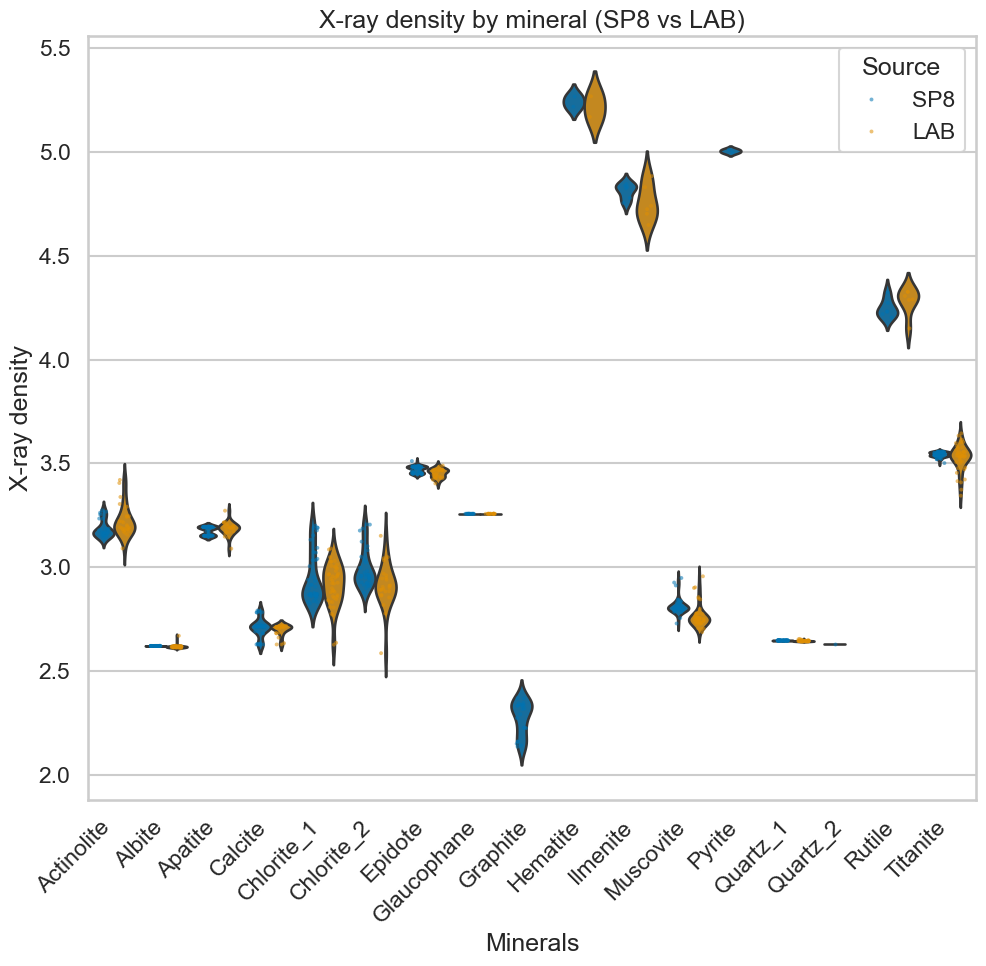

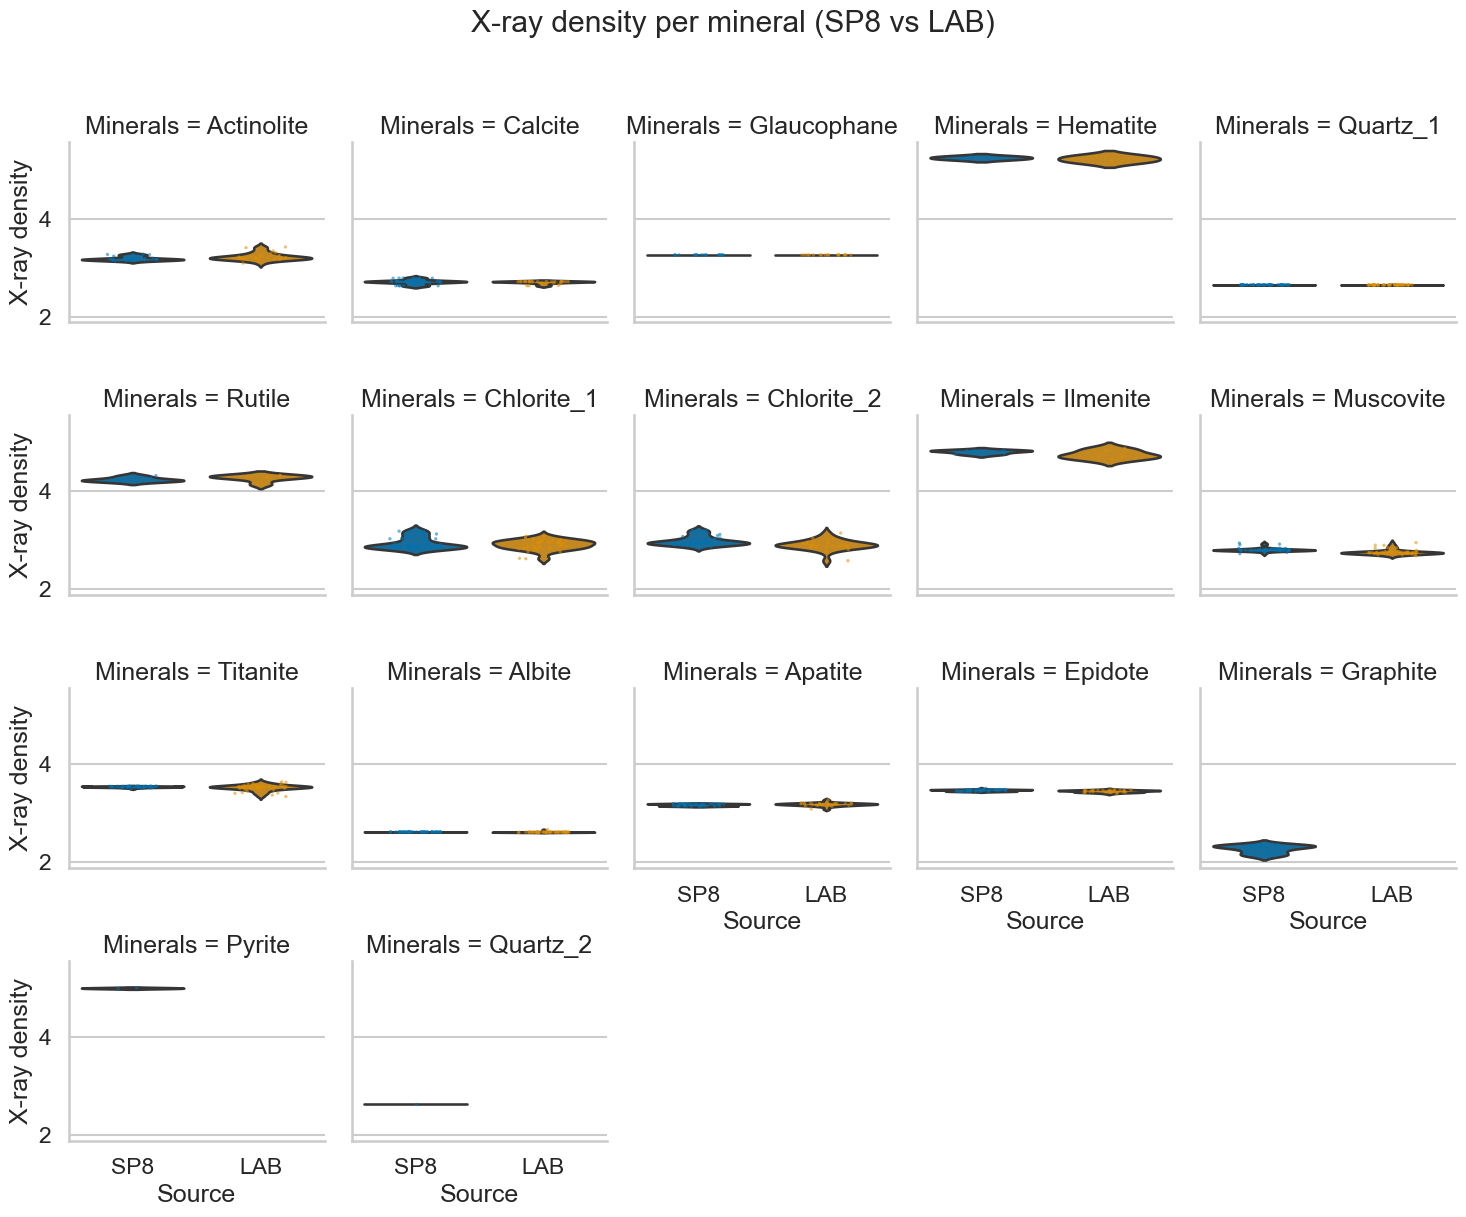

In [30]:
fig, ax = plot_density_violin_seaborn(df_Compiled_mode_Density)
g = plot_density_violin_facets(df_Compiled_mode_Density, col_wrap=5, height=3)


# 5. Calculate Bulk composition from Mineral volume (XRD; wt.%) * Mineral comp.(EPMA; wt%)

In [31]:
oxides = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']

Chl_Mafic_EPMA_database_Rep_path = "../0_DATA/0_EPMA_DATABASE/Chl_Mafic_EPMA_database_Rep_ver251109.xlsx"
Chl_Pelitic_EPMA_database_Rep_path = "../0_DATA/0_EPMA_DATABASE/Chl_Pelitic_EPMA_database_Rep_ver251109.xlsx"

Chl_Mafic_EPMA_database_Rep = pd.read_excel(Chl_Mafic_EPMA_database_Rep_path, index_col = 0, header=0)[oxides].T
Chl_Pelitic_EPMA_database_Rep = pd.read_excel(Chl_Pelitic_EPMA_database_Rep_path, index_col = 0, header=0)[oxides].T

Chl_Mafic_EPMA_database_Rep['Plagioclase']=Chl_Mafic_EPMA_database_Rep['Albite']
Chl_Pelitic_EPMA_database_Rep['Plagioclase']=Chl_Pelitic_EPMA_database_Rep['Albite']


### minera modes(wt%)から計算する

In [32]:
# ---- 前処理：Feの統一（FeO -> Fe2O3） ----
FE2O3_PER_FEO = 159.6882 / (2 * 71.844)  # ≈1.1113537665

def prep_compositions_fe_to_fe2o3(comp_df, oxides):
    """
    comp_df: 行=酸化物, 列=鉱物 の EPMA wt%
    FeをFe2O3基準に統一し、必要酸化物だけ残す
    """
    comp = comp_df.copy()
    if 'FeO' in comp.index:
        comp.loc['Fe2O3'] = comp.get('Fe2O3', 0) + comp.loc['FeO'].fillna(0) * FE2O3_PER_FEO
        comp = comp.drop(index='FeO', errors='ignore')
    comp = comp.reindex(index=oxides).fillna(0)
    return comp


# =========================== 1) XRDモード（wt%）の整形 ===========================
df_XD = pd.merge(final_df_SP8_XD, final_df_LAB_XD, on=['Sample', 'Phase'], how='outer')
df_XD["INDEX"]   = df_XD["Sample"]
df_XD["Minerals"]= df_XD["Phase"]

# SP8/LAB の XRD モード（wt%）が Mafic_compiled_data_Mode, Pelitic_compiled_data_Mode に入っている前提
# ここは既存どおりマージでOK
Mafic_compiled   = pd.merge(Mafic_compiled_data_Mode,  df_XD, on=['INDEX', 'Minerals'])
Pelitic_compiled = pd.merge(Pelitic_compiled_data_Mode, df_XD, on=['INDEX', 'Minerals'])
df_Compiled_mode = pd.concat([Mafic_compiled, Pelitic_compiled], ignore_index=True)

# ---- 体積ではなく、XRDの wt% をそのまま使う ----
# ピボット（INDEXごと・鉱物列の行列：要素は wt%）
df_Compiled_Mineral_wt_SP8 = df_Compiled_mode.pivot_table(index='INDEX', columns='Minerals',
                                                          values='SP8-XRD Mode', aggfunc='sum')
df_Compiled_Mineral_wt_LAB = df_Compiled_mode.pivot_table(index='INDEX', columns='Minerals',
                                                          values='LAB-XRD Mode', aggfunc='sum')

# ---- 部分相の合体 ----
def combine_subphases(wt_df):
    df = wt_df.copy()
    if set(['Chlorite_1','Chlorite_2']).issubset(df.columns):
        df['Chlorite'] = df.get('Chlorite_1',0).fillna(0) + df.get('Chlorite_2',0).fillna(0)
    # Amphibole = Actinolite + Glaucophane
    if 'Actinolite' in df.columns or 'Glaucophane' in df.columns:
        df['Amphibole'] = df.get('Actinolite',0).fillna(0) + df.get('Glaucophane',0).fillna(0)
    # Quartz
    if 'Quartz_1' in df.columns or 'Quartz_2' in df.columns:
        df['Quartz'] = df.get('Quartz_1',0).fillna(0) + df.get('Quartz_2',0).fillna(0)
    # 不要列ドロップ（存在するものだけ）
    drop_cols_sp8 = [c for c in ['Chlorite_1','Chlorite_2','Quartz_1','Quartz_2'] if c in df.columns]
    df = df.drop(columns=drop_cols_sp8, errors='ignore')
    # LAB側には Quartz_2 が無いケースもあるが、上のロジックは存在チェックで安全
    return df

df_Compiled_Mineral_wt_SP8 = combine_subphases(df_Compiled_Mineral_wt_SP8)
df_Compiled_Mineral_wt_LAB = combine_subphases(df_Compiled_Mineral_wt_LAB)

# ---- 行ごとに再規格化（合計=100 wt%）----
df_Compiled_Mineral_wt_SP8 = df_Compiled_Mineral_wt_SP8.div(df_Compiled_Mineral_wt_SP8.sum(axis=1), axis=0) * 100.0
df_Compiled_Mineral_wt_LAB = df_Compiled_Mineral_wt_LAB.div(df_Compiled_Mineral_wt_LAB.sum(axis=1), axis=0) * 100.0


# =========================== 2) 鉱物 wt% から 全岩 wt% へ ===========================
def bulk_from_weight_table(weights_df, compositions_df, target_indices=None,
                           oxides=('SiO2','TiO2','Al2O3','Fe2O3','MnO','MgO','CaO','Na2O','K2O','P2O5'),
                           renormalize=True):
    """
    weights_df: 行=INDEX, 列=鉱物 の wt%（合計≈100）
    compositions_df: 行=酸化物, 列=鉱物 の EPMA wt%（無水100%基準推奨）
    target_indices: 計算対象INDEX（Mafic/Peliticを分けたい時など）。Noneなら全行
    """
    comp = prep_compositions_fe_to_fe2o3(compositions_df, oxides)
    W = weights_df.copy()
    if target_indices is not None:
        W = W.loc[W.index.intersection(target_indices)]
    if W.empty:
        return pd.DataFrame()

    # 列（鉱物）の共通部分のみで整列
    common_mins = W.columns.intersection(comp.columns)
    if len(common_mins) == 0:
        return pd.DataFrame(index=W.index, columns=oxides)

    W = W[common_mins].fillna(0) / 100.0              # 比（合計=1）へ
    C = comp[common_mins]                              # 行=酸化物, 列=鉱物

    # 行列積： (samples x minerals) @ (minerals x oxides) = (samples x oxides)
    bulk = W.values @ C.T.values
    bulk_df = pd.DataFrame(bulk, index=W.index, columns=C.index)

    if renormalize:
        s = bulk_df.sum(axis=1)
        bulk_df = bulk_df.div(s.replace(0, np.nan), axis=0) * 100.0

    return bulk_df


# ===== 実行例：Mafic/Pelitic で別の EPMA データベースを使う場合 =====
oxides = ('SiO2','TiO2','Al2O3','Fe2O3','MnO','MgO','CaO','Na2O','K2O','P2O5')

# それぞれの INDEX セット（従来どおり）
# Mafic_INDEX, Pelitic_INDEX が既に与えられている前提
bulk_sp8_mafic  = bulk_from_weight_table(df_Compiled_Mineral_wt_SP8, Chl_Mafic_EPMA_database_Rep,  target_indices=Mafic_INDEX,  oxides=oxides)
bulk_sp8_pelit  = bulk_from_weight_table(df_Compiled_Mineral_wt_SP8, Chl_Pelitic_EPMA_database_Rep,target_indices=Pelitic_INDEX,oxides=oxides)
bulk_lab_mafic  = bulk_from_weight_table(df_Compiled_Mineral_wt_LAB, Chl_Mafic_EPMA_database_Rep,  target_indices=Mafic_INDEX,  oxides=oxides)
bulk_lab_pelit  = bulk_from_weight_table(df_Compiled_Mineral_wt_LAB, Chl_Pelitic_EPMA_database_Rep,target_indices=Pelitic_INDEX,oxides=oxides)

# 結合して保存
data_sp8 = pd.concat([bulk_sp8_mafic, bulk_sp8_pelit]).sort_index()
data_lab = pd.concat([bulk_lab_mafic, bulk_lab_pelit]).sort_index()

data_sp8.to_excel(folder_path + "df_mineral_wt_comp_>bulk_comp_sp8.xlsx")
data_lab.to_excel(folder_path + "df_mineral_wt_comp_>bulk_comp_lab.xlsx")


In [33]:
oxides = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'INDEX']

ALL_XRF_data = pd.concat([Mafic_XRF, Pelitic_XRF])#.set_index("INDEX")
ALL_XRF_data_melt = pd.melt(ALL_XRF_data[oxides], id_vars='INDEX', value_name='XRF')

data_sp8["INDEX"]=data_sp8.index
data_sp8_melt = data_sp8.melt(id_vars='INDEX', value_name='XRD_SP8')

data_lab["INDEX"]=data_lab.index
data_lab_melt = data_lab.melt(id_vars='INDEX', value_name='XRD_LAB')

####################################### Compile XRF
XRF_melt_compile = pd.merge(ALL_XRF_data_melt, data_sp8_melt, on=['INDEX', 'variable'], how='outer')
XRF_melt_compile = pd.merge(XRF_melt_compile, data_lab_melt, on=['INDEX', 'variable'], how='outer')
####################################### Compile XRF

XRF_melt_compile.to_excel(folder_path + "df_volume_mineral_comp_>bulk_comp_melt.xlsx")


### 鉱物密度の中央値を使って、vol%から計算する場合

In [34]:
def convert_bulk_compositions(bulk_compositions_df):
    bulk_compositions_df["Fe2O3"] = bulk_compositions_df["FeO"].apply(lambda x: x * 159.6882/(71.844*2))
    bulk_compositions_df = bulk_compositions_df.set_index("INDEX")
    bulk_compositions_df = bulk_compositions_df.drop(["FeO"], axis = 1)
    bulk_compositions_df = bulk_compositions_df.div(bulk_compositions_df.sum(axis=1), axis=0)
    return bulk_compositions_df

def calculate_bulk_composition_from_vol(df_Mineral_vol, compositions_df, index_df_Mineral_vol, mineral_density):
    """
    df_Mineral_vol: 長い形式（列に 'INDEX','Minerals','Mineral_Vol_SP8','Mineral_Vol_LAB'）
    compositions_df: 行=酸化物, 列=鉱物 の EPMA wt%（FeO/Fe2O3 はここでは触らない）
    index_df_Mineral_vol: 計算対象 INDEX の反復可能
    mineral_density: median_by_mineral_source() の返り値（列: Minerals, Source, median）

      - 体積分率 φ_i を、Source別中央値密度 ρ_i を用いて「質量分率」w_i = φ_i ρ_i / Σ(φ_j ρ_j) に変換
      - 全岩 wt% は Σ_m w_i * c_k(m) で計算（kは各酸化物）
      - その後の FeO→Fe2O3 変換＆行規格化は既存の convert_bulk_compositions に任せる
    """
    # 対象酸化物（元コードに合わせて FeO を使う。Fe2O3 変換は convert_bulk_compositions 側）
    oxides = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']

    # Source別 密度辞書（存在しない場合は鉱物内メディアンで補完）
    # 例外や欠損に強いように fallback を用意
    fallback = mineral_density.groupby('Minerals', observed=True)['median'].median()
    rho_sp8 = (mineral_density[mineral_density['Source'] == 'SP8']
               .set_index('Minerals')['median']).reindex(fallback.index).fillna(fallback).to_dict()
    rho_lab = (mineral_density[mineral_density['Source'] == 'LAB']
               .set_index('Minerals')['median']).reindex(fallback.index).fillna(fallback).to_dict()

    bulk_compositions_sp8 = []
    bulk_compositions_lab = []

    for index in index_df_Mineral_vol:
        current_index_volumes = df_Mineral_vol[df_Mineral_vol['INDEX'] == index]

        # まずは「質量重み付きの分子」を蓄積し、最後に合計質量で割る
        sp8_numer = {ox: 0.0 for ox in oxides}
        lab_numer = {ox: 0.0 for ox in oxides}
        sp8_mass_sum = 0.0
        lab_mass_sum = 0.0

        for _, row in current_index_volumes.iterrows():
            mineral = row['Minerals']
            # compositions_df に存在しない鉱物はスキップ（KeyError防止）
            if mineral not in compositions_df.columns:
                continue

            mineral_composition = compositions_df[mineral]

            # ---------- SP8側 ----------
            volume_sp8 = row.get('Mineral_Vol_SP8', None)
            if pd.notna(volume_sp8) and volume_sp8 > 0:
                rho = rho_sp8.get(mineral, None)
                if (rho is not None) and pd.notna(rho) and (rho > 0):
                    m = (volume_sp8 / 100.0) * rho  # 相対質量 φ_i * ρ_i
                    sp8_mass_sum += m
                    for oxide in oxides:
                        sp8_numer[oxide] += mineral_composition.get(oxide, 0) * m

            # ---------- LAB側 ----------
            volume_lab = row.get('Mineral_Vol_LAB', None)
            if pd.notna(volume_lab) and volume_lab > 0:
                rho = rho_lab.get(mineral, None)
                if (rho is not None) and pd.notna(rho) and (rho > 0):
                    m = (volume_lab / 100.0) * rho
                    lab_mass_sum += m
                    for oxide in oxides:
                        lab_numer[oxide] += mineral_composition.get(oxide, 0) * m

        # 質量分率で割って全岩 wt%（の“比”）にする。合計は後段で規格化される。
        bulk_composition_sp8 = {'INDEX': index}
        bulk_composition_lab = {'INDEX': index}

        if sp8_mass_sum > 0:
            for oxide in oxides:
                bulk_composition_sp8[oxide] = sp8_numer[oxide] / sp8_mass_sum
        else:
            # 値が無い場合はNaNを入れておく（後段での処理が楽）
            for oxide in oxides:
                bulk_composition_sp8[oxide] = float('nan')

        if lab_mass_sum > 0:
            for oxide in oxides:
                bulk_composition_lab[oxide] = lab_numer[oxide] / lab_mass_sum
        else:
            for oxide in oxides:
                bulk_composition_lab[oxide] = float('nan')

        bulk_compositions_sp8.append(bulk_composition_sp8)
        bulk_compositions_lab.append(bulk_composition_lab)

    # DataFrame化（以降の FeO→Fe2O3 変換と行規格化は既存関数に任せる）
    bulk_compositions_sp8_df = pd.DataFrame(bulk_compositions_sp8)
    bulk_compositions_lab_df = pd.DataFrame(bulk_compositions_lab)

    bulk_compositions_sp8_df = convert_bulk_compositions(bulk_compositions_sp8_df)
    bulk_compositions_lab_df = convert_bulk_compositions(bulk_compositions_lab_df)

    return bulk_compositions_sp8_df, bulk_compositions_lab_df



In [35]:
# Calc XRD * EPMA
database = [Chl_Mafic_EPMA_database_Rep, Chl_Pelitic_EPMA_database_Rep]
index_list = Mafic_INDEX, Pelitic_INDEX
mineral_density_list = [Mafic_mineral_density_med, Pelitic_mineral_density_med]

data_sp8 = pd.DataFrame()
data_lab = pd.DataFrame()

for compositions_df, index_df_Mineral_vol, mineral_density in zip(database, index_list, mineral_density_list):

    df_Mineral_vol = df_Compiled_Mineral_vol.copy()
    """
    Amphibole = Actinolite+Glaucophane でErrorを出すのでDrop
    Volumeの計算にも影響があるため
    """
    df_Mineral_vol = df_Mineral_vol.drop(df_Mineral_vol[df_Mineral_vol["Minerals"]=="Amphibole"].index)
    
    data_sp8_, data_lab_ = calculate_bulk_composition_from_vol(df_Mineral_vol, compositions_df, index_df_Mineral_vol, mineral_density)
    data_sp8 = pd.concat([data_sp8, data_sp8_])
    data_lab = pd.concat([data_lab, data_lab_])

data_sp8.to_excel(folder_path + "df_volume_mineral_comp_>bulk_comp_sp8.xlsx")
data_lab.to_excel(folder_path + "df_volume_mineral_comp_>bulk_comp_lab.xlsx")


In [36]:
oxides = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'INDEX']

ALL_XRF_data = pd.concat([Mafic_XRF, Pelitic_XRF])#.set_index("INDEX")
ALL_XRF_data_melt = pd.melt(ALL_XRF_data[oxides], id_vars='INDEX', value_name='XRF')

data_sp8["INDEX"]=data_sp8.index
data_sp8_melt = data_sp8.melt(id_vars='INDEX', value_name='XRD_SP8')

data_lab["INDEX"]=data_lab.index
data_lab_melt = data_lab.melt(id_vars='INDEX', value_name='XRD_LAB')

####################################### Compile XRF
XRF_melt_compile = pd.merge(ALL_XRF_data_melt, data_sp8_melt, on=['INDEX', 'variable'], how='outer')
XRF_melt_compile = pd.merge(XRF_melt_compile, data_lab_melt, on=['INDEX', 'variable'], how='outer')
####################################### Compile XRF

XRF_melt_compile[['XRD_SP8', 'XRD_LAB']] = XRF_melt_compile[['XRD_SP8', 'XRD_LAB']].apply(lambda x: x*100)

XRF_melt_compile.to_excel(folder_path + "df_volume_mineral_comp_mineral_density_med_>bulk_comp_melt.xlsx")


# 6. Calculate Bulk composition from Mineral volume (EPMA) * Mineral comp.(EPMA)

In [37]:
def convert_bulk_compositions(bulk_compositions_df):
    bulk_compositions_df["Fe2O3"] = bulk_compositions_df["FeO"].apply(lambda x: x * 159.6882/(71.844*2))
    bulk_compositions_df = bulk_compositions_df.set_index("INDEX")
    bulk_compositions_df = bulk_compositions_df.drop(["FeO"], axis = 1)
    bulk_compositions_df = bulk_compositions_df.div(bulk_compositions_df.sum(axis=1), axis=0)
    return bulk_compositions_df

# def calculate_bulk_composition_from_vol_EPMA(df_Mineral_vol, compositions_df, index_df_Mineral_vol):
#     oxides = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']
#     bulk_compositions_EPMA = []
    
#     for index in index_df_Mineral_vol:
#         # Filter the rows for the current index
#         current_index_volumes = df_Mineral_vol[df_Mineral_vol['INDEX'] == index]
#         # Initialize a dictionary to store the weighted sum of each oxide for the current index
#         bulk_composition_EPMA = {'INDEX': index}
    
#         # Iterate over each mineral in the current index
#         for _, row in current_index_volumes.iterrows():
#             mineral = row['Minerals']
#             volume_EPMA = row['EPMA Mode']
    
#             # Get the composition for the current mineral
#             mineral_composition = compositions_df[mineral]
            
#             if pd.notna(volume_EPMA):
#                 for oxide in oxides:
#                     if oxide not in bulk_composition_EPMA:
#                         bulk_composition_EPMA[oxide] = 0
#                 # Add the weighted composition to the bulk composition
#                     bulk_composition_EPMA[oxide] += mineral_composition[oxide] * volume_EPMA/100
                    
#         # Append the result to the list
#         bulk_compositions_EPMA.append(bulk_composition_EPMA)
        
#     # Convert the list of dictionaries to a DataFrame
#     bulk_compositions_EPMA_df = pd.DataFrame(bulk_compositions_EPMA)
#     bulk_compositions_EPMA_df = convert_bulk_compositions(bulk_compositions_EPMA_df)
    
#     return bulk_compositions_EPMA_df


def calculate_bulk_composition_from_vol_EPMA(df_Mineral_vol, compositions_df, index_df_Mineral_vol, mineral_density_med):
    """
    df_Mineral_vol: 列に ['INDEX','Minerals','EPMA Mode'] を含む（EPMA Mode は vol%）
    compositions_df: 行=酸化物, 列=鉱物 の EPMA wt%
    index_df_Mineral_vol: 計算対象 INDEX のリスト等
    mineral_density_med: median_by_mineral_source() の返り値（列: Minerals, Source, median）
                         ※Source が無い/単一でもOK（Minerals 毎の 'median' を使う）
    戻り値: convert_bulk_compositions() を通した DataFrame（行=INDEX, 列=酸化物）
    """
    oxides = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']

    # ---- 密度 Series を作成（Sourceは無視して鉱物ごとの中央値を採用）----
    if 'Source' in mineral_density_med.columns:
        density_s = (mineral_density_med
                     .groupby('Minerals', observed=True)['median']
                     .median())
    else:
        density_s = mineral_density_med.set_index('Minerals')['median']
    density_s = density_s.astype(float)

    bulk_rows = []

    for index in index_df_Mineral_vol:
        current = df_Mineral_vol[df_Mineral_vol['INDEX'] == index]

        # 分子・合計質量
        numer = {ox: 0.0 for ox in oxides}
        mass_sum = 0.0

        for _, row in current.iterrows():
            mineral = row['Minerals']
            # compositions_df に無い鉱物はスキップ
            if mineral not in compositions_df.columns:
                continue

            v = row.get('EPMA Mode', np.nan)  # vol%
            if pd.isna(v) or v <= 0:
                continue

            rho = density_s.get(mineral, np.nan)
            if pd.isna(rho) or rho <= 0:
                continue

            # 相対質量 m_i = φ_i * ρ_i
            m = (v / 100.0) * rho
            mass_sum += m

            print(f"相対質量{m}, EPMA Mode{v}")

            mc = compositions_df[mineral]  # Series(index=oxide)
            for ox in oxides:
                val = mc.get(ox, 0.0)
                if pd.isna(val):
                    val = 0.0
                numer[ox] += val * m

        # 質量分率で割る（比）。FeO→Fe2O3/行規格化は convert_* に任せる
        row_out = {'INDEX': index}
        if mass_sum > 0:
            for ox in oxides:
                row_out[ox] = numer[ox] / mass_sum
        else:
            for ox in oxides:
                row_out[ox] = np.nan

        bulk_rows.append(row_out)

    bulk_df = pd.DataFrame(bulk_rows)
    bulk_df = convert_bulk_compositions(bulk_df)
    return bulk_df


In [38]:
df_Mineral_vol_EPMA = df_compiled_data_Mode_EPMA[['INDEX', 'Minerals', 'EPMA Mode']].dropna() # Data
df_Mineral_vol_EPMA["INDEX"].unique()


array([ 49,  50,  64,  78,  93,  95, 113, 139])

In [39]:
# Calc XRD * EPMA
database = [Chl_Mafic_EPMA_database_Rep, Chl_Pelitic_EPMA_database_Rep]
mineral_density_list = [Mafic_mineral_density_med, Pelitic_mineral_density_med]

INDEX_EPMA_Mafic = [ 49,  50,  64,  139]
INDEX_EPMA_Pelitic = [78,  93, 95, 113,]
index_list = INDEX_EPMA_Mafic, INDEX_EPMA_Pelitic

############# AmphiboleはActinoliteとして計算
df_Mineral_vol_EPMA = df_compiled_data_Mode_EPMA[['INDEX', 'Minerals', 'EPMA Mode']].dropna() # Data
df_Mineral_vol_EPMA["Minerals"] = df_Mineral_vol_EPMA["Minerals"].replace("Amphibole", "Actinolite")
############# AmphiboleはActinoliteとして計算

data_EPMA = pd.DataFrame()

for compositions_df, index_df_Mineral_vol, mineral_density in zip(database, index_list, mineral_density_list):

    df_Mineral_vol = df_Compiled_Mineral_vol.copy()
    """
    Amphibole = Actinolite+Glaucophane でErrorを出すのでDrop
    Volumeの計算にも影響があるため
    """ 
    df_Mineral_vol = df_Mineral_vol.drop(df_Mineral_vol[df_Mineral_vol["Minerals"]=="Amphibole"].index)
    
    data_EPMA_ = calculate_bulk_composition_from_vol_EPMA(df_Mineral_vol_EPMA, compositions_df, index_df_Mineral_vol, mineral_density)
    data_EPMA = pd.concat([data_EPMA, data_EPMA_])

data_EPMA.to_excel(folder_path + "df_volume_mineral_comp_>bulk_comp_EPMA.xlsx")


相対質量0.5853867153912298, EPMA Mode22.33447979363715
相対質量0.8937954105760963, EPMA Mode28.084694754944113
相対質量0.008235167669819429, EPMA Mode0.2579535683576955
相対質量0.17973839208942388, EPMA Mode6.620808254514186
相対質量0.3475526923903698, EPMA Mode12.02708512467756
相対質量0.9649296001719692, EPMA Mode27.783748925193468
相対質量0.05304387897678418, EPMA Mode1.902407566638005
相対質量0.01991885210662081, EPMA Mode0.7523645743766122
相対質量0.008358179277730004, EPMA Mode0.23645743766122088
相対質量0.8333980068514483, EPMA Mode31.79694799127998
相対質量0.5441272189349112, EPMA Mode17.09747742136406
相対質量0.008948146994705699, EPMA Mode0.2802865151043289
相対質量0.5138733260666459, EPMA Mode17.78262223606353
相対質量1.0404939271255063, EPMA Mode29.959514170040492
相対質量0.031260355029585796, EPMA Mode1.1211460604173151
相対質量0.046997041420118346, EPMA Mode1.7751479289940828
相対質量0.006604951728433508, EPMA Mode0.1868576767362192
相対質量0.47571546429553563, EPMA Mode18.15015125126042
相対質量0.0008751947932899442, EPMA Mode0.02750022916857640

In [40]:
oxides = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'INDEX']

ALL_XRF_data = pd.concat([Mafic_XRF, Pelitic_XRF])#.set_index("INDEX")
ALL_XRF_data_melt = pd.melt(ALL_XRF_data[oxides], id_vars='INDEX', value_name='XRF')

data_EPMA["INDEX"]=data_EPMA.index
data_EPMA_melt = data_EPMA.melt(id_vars='INDEX', value_name='EPMA')

####################################### Compile XRF
XRF_melt_compile = pd.merge(ALL_XRF_data_melt, data_EPMA_melt, on=['INDEX', 'variable'], how='outer')
####################################### Compile XRF

XRF_melt_compile[['EPMA']] = XRF_melt_compile[['EPMA']].apply(lambda x: x*100)

XRF_melt_compile.dropna().to_excel(folder_path + "df_volume_mineral_comp_>bulk_comp_melt_EPMA.xlsx")


# 7. Error data compile

In [41]:
pivot_error_df = pd.read_excel(folder_path + "pivot_error_df.xlsx") # , index_col=0, header=0
sample_name_list_df= pd.read_excel(folder_path + "Sample_name_list.xlsx")

# Extract sample names from the sample_name_list
sp_8_samples = sample_name_list_df['SP-8'].dropna().tolist()
lab_samples = sample_name_list_df['LAB'].dropna().tolist()

# Filter pivot_error_df based on sample names for SP-8 and Laboratory
sp_8_data = pivot_error_df[pivot_error_df['Sample'].isin(sp_8_samples)]
lab_data = pivot_error_df[pivot_error_df['Sample'].isin(lab_samples)]

# Renaming columns to have consistent suffixes
merged_sp_8 = pd.merge(sample_name_list_df, pivot_error_df, left_on='SP-8', right_on='Sample', how='left', suffixes=('_sp8', '_lab'))
merged_lab = pd.merge(sample_name_list_df, pivot_error_df, left_on='LAB', right_on='Sample', how='left', suffixes=('_sp8', '_lab'))

merged_sp_8 = merged_sp_8.rename(columns={
    'Rwp': 'Rwp_sp8', 
    'Rexp': 'Rexp_sp8', 
    'Chi2': 'Chi2_sp8', 
    'GOF': 'GOF_sp8'
})
merged_lab = merged_lab.rename(columns={
    'Rwp': 'Rwp_lab', 
    'Rexp': 'Rexp_lab', 
    'Chi2': 'Chi2_lab', 
    'GOF': 'GOF_lab'
})

# Re-merging data to have both SP-8 and LAB columns in a single dataframe
error_data_df = pd.merge(merged_sp_8, merged_lab, on=['SP-8'])
error_data_df.to_excel(folder_path + "error_data_df.xlsx")


In [42]:
# STOP
STOP


NameError: name 'STOP' is not defined